# Neighborhood Features and Student Performance

The original file for the project can be found, [here](https://github.com/Paganiniana/Coursera_Capstone/blob/master/neighborhood_education.ipynb), with a section for each step in Dr. John Rollins' recomendation for Data Science projects.  This file reorganizes the report into the following sections:

1. [Introduction](#) 
2. [Data](#) 
3. [Methodology (Exploration and Modeling)](#)
4. [Results](#)
5. [Discussion](#) 
6. [Conclusion](#)

# 1. Introduction

The problem is this: instructors and decision-makers in the education field have a difficult time deciding where and how to invest limited resources.  The goal of these individuals is to help students to be successful. Therefore, the ability to guage which neighborhoods' students are more or less successful than any other and *why* is very valuable.  This analysis seeks to provide decision makers with a way to answer these questions: 
* Is any given student a product of their environemnt?  Put more succinclty: is there a relationship between a student's environment (on a neighborhood level) and their academic success? 
* If such a relationship exists, is it possible to say whether or not a body of students is likely to succeed, based on one perameter or another?

Given the scope of this project and the amount of data being compared, we will limit our examination to a single city: New York City.  The variety of neighborhoods and success rates among students (as well as the high volume of quality data) makes this a choice of convenience, though we are hoping, not a fatal one. If a reliable relationship between a student's environment and their success could be discovered, then decision makers would be better able to change that environment to make their students more successful, and teachers would be able to better instruct their students, knowing what factors they are working against.

## Approach

First, we must find a way of quantifying "success" in an academic setting. Thankfully, metrics such as GPA and SAT scores have long been used for such a purpose, and are readily available.

Secondly, we must find a way of identifying those "feautures" that makes any given neighborhood different from or similar to another one.  The sky is the limit, in this regard.  However, for the purposes of this analysis, we will focus on the following:

* Average per-capita income
* Number of occurences of crime (separated by type) in a given neighborhood
* Weight of neighborhood features in the form of venues (separated by type)

Given that each of these values is a countable feature and the feature we are tryign to predict (success in the form of a test score) is also a continuous quantity, we should be able to model the problem using various forms of regression.  For the Data Exploration phase, we will use various forms of linear regression to identify relationships.  For the model-building phase, we will use a polynomial regression to try to predict student success. 

# 2. Data

Any geocoded data, such as the following, should be organized either by zip code or neighborhood name.  Furthermore, dated information, such as SAT scores, crimes, and average income, should be from around around the same time period.  After all, we are supposing that the students producing these scores were subject to the environment we are measuring.

### Neighborhood Venue data

*(Constructed during previous Coursera exercises)* Contains Foursquare Data for all of New York City's neighborhoods.  This data will be crucial to try to get an overall impression regarding "what kind of neighborhood" each neighborhood is.   It features a column for each type of venue recorded, along with the weighted value of each such venue located within the neighborhood.  

### Income Data

[Income data on Kaggle](https://www.kaggle.com/wpncrh/zip-code-income-tax-data-2014)  This data set will give us what we need to compare neighborhoods based on average income.  It features an "average income" field, as well as a ZIP code, for each instance.

### Average SAT data for NY schools

[NY SAT data on Kaggle](https://www.kaggle.com/nycopendata/high-schools)  This data set gives us average SAT scores for each school in New York. The ZIP code for each school is given, which will allow us to match up the data, geographically, with our venue/income/crime counterparts.

### New York City Crime Data 

[Crime Data on Kaggle](https://www.kaggle.com/adamschroeder/crimes-new-york-city)   This data set includes a column for "type" of crime commited, as well as the lattitude and longitude of the incident. This data will allow us to find the ZIP code in which each incident occured, and, from this, match it to the neighborhoods being analyzed.

In [3]:
# import basic libraries

import pandas as pd 
import numpy as np

In [4]:
# import data from CSV files

ny_crimes_df = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv')
ny_crimes_df_desc = pd.read_csv('data/Crime_Column_Description.csv')


In [5]:
# Crime Data
print(ny_crimes_df_desc['Description'])
ny_crimes_df.head()

0     Randomly generated persistent ID for each comp...
1     Exact date of occurrence for the reported even...
2     Exact time of occurrence for the reported even...
3     Ending date of occurrence for the reported eve...
4     Ending time of occurrence for the reported eve...
5                    Date event was reported to police 
6               Three digit offense classification code
7     Description of offense corresponding with key ...
8     Three digit internal classification code (more...
9     Description of internal classification corresp...
10    Indicator of whether crime was successfully co...
11    Level of offense: felony, misdemeanor, violation 
12    Jurisdiction responsible for incident. Either ...
13    The name of the borough in which the incident ...
14          The precinct in which the incident occurred
15    Specific location of occurrence in or around t...
16    Specific description of premises; grocery stor...
17    Name of NYC park, playground or greenspace

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [6]:
# Income Data
income_df = pd.read_csv('data/14zpallagi.csv')

In [7]:
income_df.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,850050.0,481840.0,115070.0,240450.0,479900.0,1401930.0,...,389850.0,324575.0,0.0,0.0,0.0,0.0,62690.0,47433.0,744910.0,1964826.0
1,1,AL,0,2,491370.0,200750.0,150290.0,125560.0,281350.0,1016010.0,...,397110.0,950446.0,0.0,0.0,0.0,0.0,70780.0,101969.0,413790.0,1177400.0
2,1,AL,0,3,259540.0,75820.0,142970.0,34070.0,156720.0,589190.0,...,250230.0,1319641.0,0.0,0.0,0.0,0.0,62170.0,132373.0,192050.0,538160.0
3,1,AL,0,4,164840.0,26730.0,125410.0,10390.0,99750.0,423300.0,...,163580.0,1394913.0,0.0,0.0,0.0,0.0,45120.0,124048.0,115470.0,375882.0
4,1,AL,0,5,203650.0,18990.0,177070.0,5860.0,122670.0,565930.0,...,203050.0,3655700.0,610.0,135.0,270.0,66.0,81180.0,387298.0,114380.0,448442.0


In [8]:
# SAT Data
sat_df = pd.read_csv('data/scores.csv')

In [9]:
sat_df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [10]:
# Neighborhood Data
venues_df = pd.read_csv('data/100_venues_for_all_ny_hoods.csv')
neighborhood_df = pd.read_csv('data/ny_neighborhood_venu_cat_weight.csv')

In [11]:
neighborhood_df.head()

,Unnamed: 0,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,Allerton,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Annadale,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Arlington,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data description

## Crime Data

From glancing through the descriptions, it becomes evident that we are most interested in the following columns:

* KY_CD - The code describing what type of crime was commited
* OFNS_DESC - A description of KY_CD
* Latitude
* Longitude

We could learn alot more about each occurence by trying to correspond each event with a description of the venue, or the day of the week, but this information will have to do.

## Income Data

With this data, we would like to estimate the average income per zipcode. Obviously, we will have to assign the resulting values to multiple neighborhoods.  However, the US Tax return data provided above will allow us to perform this calculation.  

* zipcode - the ZIP code related to these filings
* N1 - Number of returns filed
* N02650 - Number of returns filed with 'total income' (one might say, the 'number of people making money in this zip code')
* A00100 - Adjust gross income (this field is measured in thousands of dollars)

Note that this dataset is separated, by income bracket, with approximately 6 rows per ZIP code.  This bracket number is found in "AGB_STUB".  However, for the purposes of this analysis, we will be grouping all values together and dividing by the number of returns to get an "average AGI per capita" number.  This is what we will be using to perform our analysis.


## School Data

For this data set, we are really only interested in the following:

* School ID 
* School Name
* Latitude
* Longitude 
* Student Enrollment 
* Average Score (SAT Math)
* Average Score (SAT Reading)
* Average Score (SAT Writing)

The latitude and longitude values will allow us to match these schools to the correct neighborhood. After that, we will use the Average Scores (Math, Reading, Writign) when comparing and contrasting neighborhoods.

Note that in 2014, the maximum score on the SAT was 2400, with a potential of 800 points per section, Reading, Writing, and Mathematics.

## Feature selection

### Slimming Things Down

Here, we will select only those columns we are interested in from the datsets listed above. After that, we will rename them for the sake of sanity.

In [12]:
# Reshape income data - limit columns

income_df = income_df[['zipcode', 'N1', 'N02650', 'A00100']]

# Assign column names

temp_cols = ['zipcode', 'total_returns', 'total_returns_with_income', 'agi']

income_df.columns = temp_cols

# Multiply agi by 1000 to get actual dollars

income_df['agi'] = income_df['agi'] * 1000

income_df.head()

,zipcode,total_returns,total_returns_with_income,agi
0,0,850050.0,850050.0,1.100499e+10
1,0,491370.0,491370.0,1.765845e+10
2,0,259540.0,259540.0,1.596394e+10
3,0,164840.0,164840.0,1.429438e+10
4,0,203650.0,203650.0,2.738710e+10


In [13]:
# Reshape School data - limit data

sat_df = sat_df[['School ID', 'School Name', 'Latitude', 'Longitude', 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']]

# Rename colummns

temp_cols = ['school_id', 'school_name', 'lat', 'lng', 'sat_math_av', 'sat_reading_av', 'sat_writing_av']

sat_df.columns = temp_cols

sat_df.head()


,school_id,school_name,lat,lng,sat_math_av,sat_reading_av,sat_writing_av
0,02M260,Clinton School Writers and Artists,40.75321,-73.99786,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,40.86605,-73.92486,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",40.71873,-73.97943,657.0,601.0,601.0
3,02M294,Essex Street Academy,40.71687,-73.98953,395.0,411.0,387.0
4,02M308,Lower Manhattan Arts Academy,40.71687,-73.98953,418.0,428.0,415.0


In [14]:
# Drop all columns where SAT scores are missing

print(sat_df.shape)
print(sat_df[['sat_math_av']].dropna(axis=0).shape)

sat_df.dropna(axis=0, inplace=True)


(435, 7)
(375, 1)


In [15]:
# For speed concerns, sample small portion of crime rows

ny_crimes_df = ny_crimes_df.sample(frac=0.10).reset_index(drop=True)

In [16]:
# Reshape crime data - get only desired columns

ny_crimes_df = ny_crimes_df[['CMPLNT_NUM', 'KY_CD', 'OFNS_DESC', 'Latitude', 'Longitude']] 

# Replace column names

temp_cols = ['complaint_id', 'event_code', 'event_description', 'lat', 'lng']
ny_crimes_df.columns = temp_cols

ny_crimes_df.head()

,complaint_id,event_code,event_description,lat,lng
0,600416816,341,PETIT LARCENY,40.837779,-73.919451
1,426954410,109,GRAND LARCENY,40.752379,-73.854767
2,911548055,341,PETIT LARCENY,40.758895,-73.984837
3,421028070,106,FELONY ASSAULT,40.674831,-73.863617
4,998523965,105,ROBBERY,40.819274,-73.868271


In [17]:
# Drop rows missing lat/lng data

print(ny_crimes_df.shape)
ny_crimes_df.dropna(axis=0, inplace=True)
print(ny_crimes_df.shape)



(104858, 5)
(101421, 5)


In [18]:
ny_crimes_df.shape

(101421, 5)

In [19]:
# Reshape neighborhood/venue data

# Wrangle venues_df to extract Lat/Lng data and assign to neighborhood_df
temp = venues_df[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']].drop_duplicates().reset_index(drop=True)

# Get lat-lng values in order of neighborhood_df

lat = []
lng = []
for n in neighborhood_df['Neighborhood']:
    r = temp[temp['Neighborhood'] == n]
    lat.append(r['Neighborhood Latitude'].iloc[0])
    lng.append(r['Neighborhood Longitude'].iloc[0])

# Assign new columns to neighborhood_df

neighborhood_df['Neighborhood Latitude'] = lat
neighborhood_df['Neighborhood Longitude'] = lng

# Drop unncessary "Unnamed" column from neighborhood df
try:
    neighborhood_df.drop(columns=["Unnamed: 0"], inplace=True)
except:
    print("already dropped column")

In [20]:
neighborhood_df.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Neighborhood Latitude,Neighborhood Longitude
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.865788,-73.859319
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.538114,-74.178549
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.549286,-74.185887
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.635325,-74.165104
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.596313,-74.067124


In [21]:
neighborhood_df.shape

(300, 429)

### Note about the uszipcode library

It becomes necessary, at this point, to try to get a ZIP code that matches each of our neighborhoods in "neighborhood_df".  With this information, we can then compare it to our other geocoded data organized by ZIP.

For notes on API usage, see the [docs](https://pypi.org/project/uszipcode/).

In [22]:
# Use uszipcodes library to get zip codes for each neighborhood

import uszipcode 

search = uszipcode.SearchEngine()

zips = []

for lat, lng in zip(neighborhood_df['Neighborhood Latitude'], neighborhood_df['Neighborhood Longitude']):
    print(f'Getting ZIP for {lat}, {lng}')
    res = search.by_coordinates(lat, lng, radius=10, returns=1)
    zips.append(res[0].zipcode)
    print(f'Found ZIP, {res[0].zipcode}')
len(zips.un)

88
Found ZIP, 11357
Getting ZIP for 40.73301404027834, -73.73889198912481
Found ZIP, 11427
Getting ZIP for 40.576155565431094, -73.8540175039252
Found ZIP, 11694
Getting ZIP for 40.72857318176675, -73.72012814826904
Found ZIP, 11426
Getting ZIP for 40.857277100738955, -73.88845196134805
Found ZIP, 10458
Getting ZIP for 40.61100890202044, -73.99517998380729
Found ZIP, 11204
Getting ZIP for 40.615149550453076, -73.89855633630317
Found ZIP, 11234
Getting ZIP for 40.73725071694497, -73.93244235260178
Found ZIP, 11101
Getting ZIP for 40.60577868452358, -74.18725638381567
Found ZIP, 10311
Getting ZIP for 40.68568291209144, -73.98374824115798
Found ZIP, 11217
Getting ZIP for 40.633130512758015, -73.99049823044811
Found ZIP, 11219
Getting ZIP for 40.55740128845452, -73.92551196994168
Found ZIP, 11697
Getting ZIP for 40.71093547252271, -73.81174822458634
Found ZIP, 11435
Getting ZIP for 40.57682506566604, -73.96509448785335
Found ZIP, 11235
Getting ZIP for 40.60302658351238, -73.8200548911032
F

AttributeError: 'list' object has no attribute 'un'

In [23]:
zips = pd.Series(zips)
len(zips.unique())

148

In [24]:
# Assign zip values to zip column in neighborhood_df

neighborhood_df['zip'] = zips

In [25]:
neighborhood_df.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Neighborhood Latitude,Neighborhood Longitude,zip
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.865788,-73.859319,10469
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.538114,-74.178549,10312
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.549286,-74.185887,10312
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.635325,-74.165104,10303
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.596313,-74.067124,10305


### Multiple methods for neighborhood assignment

As wonderful as the uszipcodes library is, it appears to have given us duplicated ZIP codes for most of our neighborhoods.  In fact, there are only 4 unique addresses in the list.  (We have 300 neighborhoods in our df, with 148 unique ZIP codes)  We would like to maintain the locality of our neighborhoods, so it does not do us very much good to try to combine them at a ZIP code level.  Therefore, we will attempt a different approach.

### Geopy

Geopy features a set of methods under their 'distance' package that allows us to compare two sets of lat/lng coordinates and returns the patience.  Therefore, we will use the lat/lng description for each neighborhood and, when comparing things such as schools and crime events, assign them to neighborhoods based on the closest lat/lng.  However, some things, like average income, are still organized by ZIP. Therefore, some of this data will have to be duplicated across neighborhood instances.

In [26]:
# Define a function to get the neighborhood name closest to the given lat/lng

from geopy import distance

def get_closest_neighborhood(lat, lng):
    temp_df = neighborhood_df[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']]
    distance_list = []

    # loop through neighborhoods and get distance
    for n, n_lat, n_lng in zip(temp_df['Neighborhood'], temp_df['Neighborhood Latitude'], temp_df['Neighborhood Longitude']):
        distance_list.append(distance.distance(
            (lat, lng),
            (n_lat, n_lng)
        ).km)

    # Use index of minimum distance to get neighborhood name 
    return temp_df['Neighborhood'][distance_list.index(min(distance_list))]


In [27]:
# Test

# Use lat/lng for first neighborhood

print(get_closest_neighborhood(neighborhood_df['Neighborhood Latitude'][0], neighborhood_df['Neighborhood Longitude'][0]),
    " ...should be the same as... ", 
    neighborhood_df['Neighborhood'][0])

Allerton  ...should be the same as...  Allerton


### Assign neighborhoods

Using one of the two methods above, assign neighborhood values to each of the schools, crimes, and income values listed above.

NOTE: regarding crimes_df, this crime data set is so large, and the algorithm for attributing neighborhoods so inefficient that, here, I import the attributed data.  Running the full loop turned out to be rather costly.



In [28]:
# Crimes, assign neighborhood to each crime

ny_crimes_df = pd.read_csv('data/parsed_crimes_with_neighborhoods.csv')

ny_crimes_df.drop(columns=['Unnamed: 0'], inplace=True)

ny_crimes_df.head()

,complaint_id,event_code,event_description,lat,lng,neighborhood
0,392490351,109,GRAND LARCENY,40.596633,-73.748617,Far Rockaway
1,390672794,235,DANGEROUS DRUGS,40.693777,-73.800515,South Jamaica
2,557473111,345,OFFENSES RELATED TO CHILDREN,40.625295,-73.939834,Flatlands
3,434691963,344,ASSAULT 3 & RELATED OFFENSES,40.762663,-73.982125,Midtown
4,519502358,109,GRAND LARCENY,40.750999,-73.990625,Midtown South


In [29]:
# Get the total number of crimes commited, per neighborhood

ny_crimes_av_df = ny_crimes_df.groupby('neighborhood').count()

ny_crimes_av_df['neighborhood'] = ny_crimes_av_df.index

ny_crimes_av_df['crime_count'] = ny_crimes_av_df['lng']

ny_crimes_av_df.reset_index(inplace=True, drop=True)

ny_crimes_av_df = ny_crimes_av_df[['neighborhood', 'crime_count']]

ny_crimes_av_df['neighborhood'] = ny_crimes_av_df['neighborhood'].astype('object')

In [30]:
# Income, get just incomes that are in neighborhoods

key = income_df['zipcode'].isin(neighborhood_df['zip'])

income_df = income_df[key]

# get per capita income by dividing agi by number of returns

income_df = income_df.groupby('zipcode').sum()

income_df['per_capita_income'] = income_df['agi'] / income_df['total_returns']

In [31]:
income_df['zipcode'] = income_df.index

income_df.reset_index(drop=True, inplace=True)

income_df.head()

,total_returns,total_returns_with_income,agi,per_capita_income,zipcode
0,14080.0,14080.0,2.363960e+09,167894.886364,10001
1,43370.0,43370.0,2.215542e+09,51084.666820,10002
2,33310.0,33310.0,2.580470e+09,77468.327829,10009
3,30270.0,30270.0,7.959849e+09,262961.645193,10011
4,12810.0,12810.0,3.198843e+09,249714.519906,10012


In [32]:
temp_i_zip = income_df['zipcode'].astype('int64')
temp_n_zip = neighborhood_df['zip'].astype('int64')
sum(temp_i_zip.isin(temp_n_zip))
# temp_zip = neighborhood_df['zip'].astype('object')[0]

# sum(income_df['zipcode'].astype('object') == temp_zip)

len(temp_n_zip.unique())

148

In [33]:
# Attach income data to neighborhood_df 


incomes = []
for n, zipc in zip(neighborhood_df['Neighborhood'], neighborhood_df['zip'].astype('int64')):
    r = income_df[income_df['zipcode'].astype('int64') == zipc]
    try:
        incomes.append(r['per_capita_income'].iloc[0])
    except:
        # if income data is not available, for some reason, assign mean
        incomes.append(income_df['per_capita_income'].mean())

neighborhood_df['per_capita_income'] = incomes

In [34]:
neighborhood_df.head()


,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Neighborhood Latitude,Neighborhood Longitude,zip,per_capita_income
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.865788,-73.859319,10469,42555.566067
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.538114,-74.178549,10312,78045.814519
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.549286,-74.185887,10312,78045.814519
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.635325,-74.165104,10303,43099.915966
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.596313,-74.067124,10305,59446.109052


In [35]:
# Assign a neighborhood to each school

school_n = []
for lat, lng in zip(sat_df['lat'], sat_df['lng']):
    # Get closest neighborhood center
    n = get_closest_neighborhood(lat, lng)
    # append
    school_n.append(n)
# assign list to sat_df

sat_df['neighborhood'] = school_n

In [36]:
sat_df.dtypes

school_id          object
school_name        object
lat               float64
lng               float64
sat_math_av       float64
sat_reading_av    float64
sat_writing_av    float64
neighborhood       object
dtype: object

In [37]:
sat_df.head()

,school_id,school_name,lat,lng,sat_math_av,sat_reading_av,sat_writing_av,neighborhood
2,01M539,"New Explorations into Science, Technology and ...",40.71873,-73.97943,657.0,601.0,601.0,Lower East Side
3,02M294,Essex Street Academy,40.71687,-73.98953,395.0,411.0,387.0,Chinatown
4,02M308,Lower Manhattan Arts Academy,40.71687,-73.98953,418.0,428.0,415.0,Chinatown
5,02M545,High School for Dual Language and Asian Studies,40.71687,-73.98953,613.0,453.0,463.0,Chinatown
6,01M292,Henry Street School for International Studies,40.71376,-73.98526,410.0,406.0,381.0,Lower East Side


### Data in its final form:

A single DF, with the following collumns:

* Neighborhood name 
* Average SAT score (sum of math, reading, writing)
* total number of crimes commited in neighborhood 
* average income for that neighborhood 
* number of each venue type in neighborhood 


In [38]:
combined_df = pd.DataFrame()

In [39]:
# Get average School scores

temp_df = sat_df.groupby('neighborhood').mean()

temp_df['neighborhood'] = temp_df.index.astype('object')

temp_df['neighborhood'] = temp_df['neighborhood'].astype('string')

# Attach to combined_df

combined_df = temp_df[['neighborhood']]

combined_df['sat_av'] = temp_df['sat_math_av'] + temp_df['sat_reading_av'] + temp_df['sat_writing_av']

combined_df.reset_index(inplace=True, drop=True)


In [40]:
combined_df

,neighborhood,sat_av
0,Astoria,1370.00
1,Auburndale,1462.00
2,Bay Ridge,1390.00
3,Bayside,1487.00
4,Bedford Park,2041.00
...,...,...
132,West Farms,1136.75
133,Westchester Square,1223.00
134,Williamsburg,1089.00
135,Wingate,1252.00


In [41]:
# Use ny_crimes_av_df to assign a number of crimes to each row 

num_crimes = []
for n in combined_df['neighborhood']:
    r = ny_crimes_av_df[ny_crimes_av_df['neighborhood'] == n]
    num_crimes.append(r['crime_count'].iloc[0])

combined_df['total_crime_count'] = num_crimes


In [42]:
# Get average income
income = []
for n in combined_df['neighborhood']:
    r = neighborhood_df[neighborhood_df['Neighborhood'] == n]
    income.append(r['per_capita_income'].iloc[0])

combined_df['per_capita_income'] = income

In [43]:
# Get venue data

temp_df = pd.DataFrame()

# Remove redundant or un-needed columns

remove_columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'zip', 'per_capita_income']

key = neighborhood_df.columns.isin(remove_columns) == False

combined_df[neighborhood_df.columns[key]] = neighborhood_df[neighborhood_df.columns[key]]

combined_df.head()

,neighborhood,sat_av,total_crime_count,per_capita_income,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Astoria,1370.0,602,49917.543021,0.0,0.0,0.0,0.0,0.0,0.031250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Auburndale,1462.0,272,56802.013058,0.0,0.0,0.0,0.0,0.0,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bay Ridge,1390.0,486,70479.421222,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayside,1487.0,181,65713.347921,0.0,0.0,0.0,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bedford Park,2041.0,479,26756.668643,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. Methodology

Here, we will use the data, in its final form, to attempt several forms of regression analysis.  The goal is to determine whether or not, given the above data, we can reasonably predict student succcess and, thus, validate our model.

## Some Exploration

In [44]:
# Quick values for for non-venue columns

non_venue_cols = ['neighborhood', 'sat_av', 'total_crime_count', 'per_capita_income']

# Quick values for venue columns 

key = combined_df.columns.isin(non_venue_cols) == False

venue_cols = combined_df.columns[key]


In [45]:
# Get Correlation between none-venue items

combined_df[non_venue_cols].corr()

,sat_av,total_crime_count,per_capita_income
sat_av,1.000000,-0.263180,0.203433
total_crime_count,-0.263180,1.000000,-0.064759
per_capita_income,0.203433,-0.064759,1.000000


In [46]:
# Get correlation between venue items and sat_av

combined_df[['sat_av'] + list(venue_cols)].corr()

,sat_av,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
sat_av,1.000000,-0.055554,-0.015849,NaN,NaN,0.016753,0.052066,NaN,0.024645,-0.043747,...,NaN,NaN,-0.109746,0.073378,-0.019140,-0.083826,-0.044278,-0.035917,-0.028272,-0.034579
Yoga Studio,-0.055554,1.000000,-0.046752,NaN,NaN,-0.039782,-0.017294,NaN,0.213894,-0.009964,...,NaN,NaN,-0.034294,0.193266,-0.034294,0.190819,0.219432,0.356293,-0.058299,0.002413
Accessories Store,-0.015849,-0.046752,1.000000,NaN,NaN,0.073456,0.083487,NaN,-0.017119,-0.012708,...,NaN,NaN,-0.010024,-0.010024,0.874295,-0.010024,-0.037957,-0.051508,-0.017041,0.463565
Adult Boutique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghan Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whisky Bar,-0.083826,0.190819,-0.010024,NaN,NaN,-0.008530,-0.004723,NaN,-0.012557,-0.009321,...,NaN,NaN,-0.007353,-0.007353,-0.007353,1.000000,-0.027842,0.037681,-0.012500,-0.017817
Wine Bar,-0.044278,0.219432,-0.037957,NaN,NaN,-0.032298,0.001466,NaN,0.020417,-0.035296,...,NaN,NaN,-0.027842,0.133253,-0.027842,-0.027842,1.000000,0.443669,0.011122,-0.012256
Wine Shop,-0.035917,0.356293,-0.051508,NaN,NaN,-0.043829,0.059373,NaN,0.088570,-0.014197,...,NaN,NaN,-0.037782,0.114784,-0.037782,0.037681,0.443669,1.000000,-0.050390,0.029686
Wings Joint,-0.028272,-0.058299,-0.017041,NaN,NaN,-0.014500,-0.021164,NaN,-0.021347,-0.015846,...,NaN,NaN,-0.012500,-0.012500,-0.012500,-0.012500,0.011122,-0.050390,1.000000,-0.030290


#### Note: * All numbers are very low. This should give us a clue at our eventual conclusion. *

## Crime and student success

Here, we plot our number of crimes on the X axis and the SAT average on the Y axis, in an attempt to visualize any relationship between the two. 

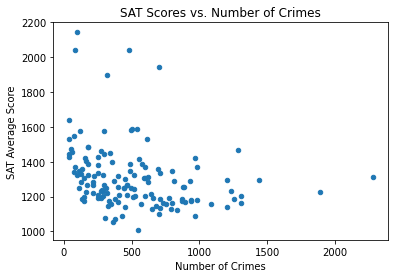

In [47]:
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

# Scatter Plot

combined_df.plot.scatter('total_crime_count', 'sat_av')
plt.title("SAT Scores vs. Number of Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("SAT Average Score")
plt.show()

## Income and Student Success

Here, we do the same with income data.

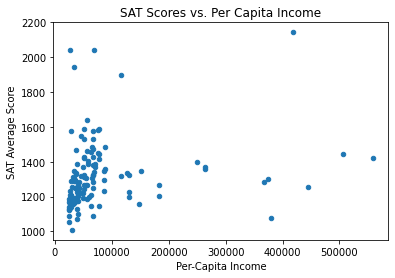

In [48]:
# Get Correlations

combined_df.plot.scatter('per_capita_income', 'sat_av')

plt.title('SAT Scores vs. Per Capita Income')
plt.xlabel('Per-Capita Income')
plt.ylabel('SAT Average Score')

plt.show()

#### Note: *Our Per-Capita income has very, very few big numbers, and lots of little numbers. Consider reassessing how this value is guaged in future revisions.*

## Venue and Student Scores

For this evaluation, we will take the ten most peformant neighborhoods along with the ten least performant and determine their most prominent features, in an attempt to determine any common elements.

In [49]:
# Get top 10 most performant neighborhoods 

top_schools_df = combined_df.sort_values('sat_av', ascending=False)[:10]

# Get row indexes

key = top_schools_df.columns.isin(venue_cols)

for index, row in top_schools_df.iterrows():
    # Iterate through and get values
    values = []
    for c in venue_cols:
        values.append(row[c])
    
    # Rank values
    values = np.array(values)
    ranks=np.argsort(-1*values)[:10]
    
    # Format and print
    print(f"----- {row['neighborhood']} -----")
    print(f"Average SAT Score: {row['sat_av']}")
    print('\n')
    print("Venues by Weight:")
    for r in ranks:
        print(f"{venue_cols[r]} - {values[r]}")
    print('\n')
    print('\n')


----- Tribeca -----
Average SAT Score: 2144.0


Venues by Weight:
Deli / Bodega - 0.1176470588235294
Grocery Store - 0.1176470588235294
Metro Station - 0.1176470588235294
Garden - 0.05882352941176471
Food - 0.05882352941176471
Big Box Store - 0.05882352941176471
Gym / Fitness Center - 0.05882352941176471
Park - 0.05882352941176471
Tennis Court - 0.05882352941176471
Furniture / Home Store - 0.05882352941176471




----- Bedford Park -----
Average SAT Score: 2041.0


Venues by Weight:
Pizza Place - 0.1
Deli / Bodega - 0.1
Italian Restaurant - 0.1
Bus Stop - 0.1
Bagel Shop - 0.05
Hotel - 0.05
Athletics & Sports - 0.05
Middle Eastern Restaurant - 0.05
Polish Restaurant - 0.05
Mediterranean Restaurant - 0.05




----- New Dorp -----
Average SAT Score: 2041.0


Venues by Weight:
Deli / Bodega - 0.1
Mexican Restaurant - 0.1
Caribbean Restaurant - 0.1
Coffee Shop - 0.1
Juice Bar - 0.05
Middle Eastern Restaurant - 0.05
Pharmacy - 0.05
Bank - 0.05
Bagel Shop - 0.05
Pizza Place - 0.05




----- J

In [50]:
# Get top 10 least performant neighborhoods 

bottom_schools_df = combined_df.sort_values('sat_av')[:10]

# Get row indexes

key = top_schools_df.columns.isin(venue_cols)

for index, row in bottom_schools_df.iterrows():
    # Iterate through and get values
    values = []
    for c in venue_cols:
        values.append(row[c])
    
    # Rank values
    values = np.array(values)
    ranks=np.argsort(-1*values)[:10]
    
    # Format and print
    print(f"----- {row['neighborhood']} -----")
    print(f"Average SAT Score: {row['sat_av']}")
    print('\n')
    print("Venues by Weight:")
    for r in ranks:
        print(f"{venue_cols[r]} - {values[r]}")
    print('\n')
    print('\n')


----- Broadway Junction -----
Average SAT Score: 1009.0


Venues by Weight:
Bar - 0.0684931506849315
Pizza Place - 0.0410958904109589
Sushi Restaurant - 0.0410958904109589
American Restaurant - 0.0410958904109589
Indian Restaurant - 0.0410958904109589
Mexican Restaurant - 0.0410958904109589
Bakery - 0.0273972602739726
Pub - 0.0273972602739726
Italian Restaurant - 0.0273972602739726
Ice Cream Shop - 0.0273972602739726




----- Morris Heights -----
Average SAT Score: 1053.0


Venues by Weight:
Thai Restaurant - 0.20833333333333331
Mexican Restaurant - 0.16666666666666666
South American Restaurant - 0.08333333333333333
Vietnamese Restaurant - 0.08333333333333333
Chinese Restaurant - 0.04166666666666666
Indonesian Restaurant - 0.04166666666666666
Colombian Restaurant - 0.04166666666666666
Argentinian Restaurant - 0.04166666666666666
Sushi Restaurant - 0.04166666666666666
Malay Restaurant - 0.04166666666666666




----- Woodhaven -----
Average SAT Score: 1070.5


Venues by Weight:
Gourmet 

## Modeling

Here, we will attempt to use several linear regression models to correctly guage accuracy.  The X (independent variable) of our model will be all quantitative columns of our combined_df, minus the sat_av.  The y (dependent variable) will be the sat_av column.  We will test the following methods:

* Multiple Linear Regression 
* Polynomial Regression (degree 2)
* Ridge Regression 
* Polynomial Ridge Regression (degree 2)

### Multiple Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# get all collumns besdies sat_av for training

X = combined_df[['total_crime_count', 'per_capita_income'] + list(venue_cols)]
y = combined_df['sat_av']
 
# Get training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Linear Model

m_reg = LinearRegression()

m_reg.fit(X_train, y_train)

# Get prediction

y_pred = m_reg.predict(X_test)



In [52]:
### Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

pX_train = poly.fit_transform(X_train)
pX_test = poly.fit_transform(X_test)

# Train Polynomial Regression Model

pr_model = LinearRegression().fit(pX_train, y_train)

# Get prediction

y_pred_pr = pr_model.predict(pX_test)


#### Note:

*In the exploration of polynomial features, we have decided, arbitrarily, to limit our investigation to 2nd degree polynomial features.  This is the result of a computational constraint. Higher degree polynomial versions of our data table proved to be too computationaly expensive (memory hungry, in this case) to attempt to execute. *  

In [53]:
### Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Get best alpha value and train model

parameters = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

RR = Ridge()

r_model = GridSearchCV(RR, parameters, cv=4)

r_model.fit(X_train, y_train)

# Make prediction

y_pred_rr = r_model.predict(X_test)

In [54]:
## Ridge Regression with Polynomial Features

# Use params rom RR

prr_model = GridSearchCV(RR, parameters, cv=4)

# Use training data from PR

prr_model.fit(pX_train, y_train)

# Make prediction

y_predict_prr = prr_model.predict(pX_test)

### Model Comparison

Here, we will graph the real SAT data from our test set against the predicted SAT data for each model.  Then, we will analyze each model's MSR and R^2 scores. Using this data, we will try to choose the most predictive model.

Mean Squared Error:  127772.95905500672
R^2 Score:  -3.3825141629480235


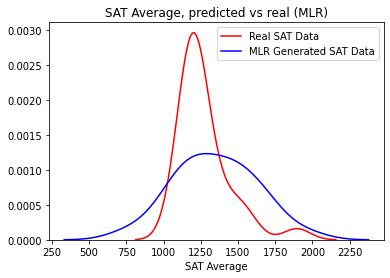

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# MLR

sns.distplot(y_test, hist=False, color="red", label="Real SAT Data")
sns.distplot(y_pred, hist=False, color="blue", label="MLR Generated SAT Data")

plt.xlabel("SAT Average")
plt.title("SAT Average, predicted vs real (MLR)")

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R^2 Score: ", r2_score(y_test, y_pred))
plt.show()

Mean Squared Error:  165914.79393366794
R^2 Score:  -4.690749745757028


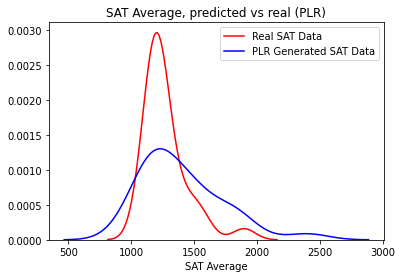

In [56]:
# PLR 

sns.distplot(y_test, hist=False, color="red", label="Real SAT Data")
sns.distplot(y_pred_pr, hist=False, color="blue", label="PLR Generated SAT Data")

plt.xlabel("SAT Average")
plt.title("SAT Average, predicted vs real (PLR)")

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_pr))
print("R^2 Score: ", r2_score(y_test, y_pred_pr))

plt.show()

Mean Squared Error:  34084.61697178244
R^2 Score:  -0.16907613099253704


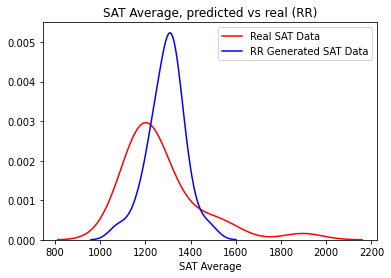

In [57]:
# RR

sns.distplot(y_test, hist=False, color="red", label="Real SAT Data")
sns.distplot(y_pred_rr, hist=False, color="blue", label="RR Generated SAT Data")

plt.xlabel("SAT Average")
plt.title("SAT Average, predicted vs real (RR)")

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_rr))
print("R^2 Score: ",r2_score(y_test, y_pred_rr))
plt.show()


Mean Squared Error:  55313.66424020533
R^2 Score:  -0.8972161146623512


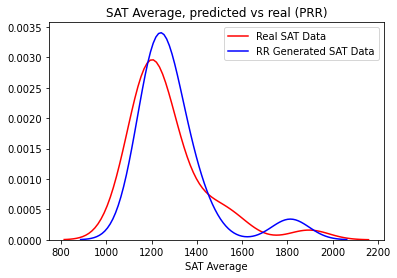

In [58]:
# Polynomial RR

sns.distplot(y_test, hist=False, color="red", label="Real SAT Data")
sns.distplot(y_predict_prr, hist=False, color="blue", label="RR Generated SAT Data")

plt.xlabel("SAT Average")
plt.title("SAT Average, predicted vs real (PRR)")

print("Mean Squared Error: ", mean_squared_error(y_test, y_predict_prr))
print("R^2 Score: ", r2_score(y_test, y_predict_prr))

plt.show()

# 4. Results

## The question

What we want to know is this: what factors are the most important in making predictions?  This requires a little bit of ingenuity.  If our model were a simple Linear Regression algorithm, we could easily normalize our data and compare our coefficient values to determine which feature is the most important in predictability.

### Simple Feature Selection, Linear Model

Here, we give an example of what is described above.  Scikit Learn gives us a method, called permutation_importance, that works by randomly shuffling the columns in a dataset ang guaging which ones have the greatest affect on its performance, measured by its R^2 score.  Below, we perform this analysis on our Multiple Linear Regression model.  Note that, given our model's low R^2 score, to begin with, the most importance features are pretty nonsensical. It is intuitively obvious that the presence of bagel shops and mexican restaurants have little impact on a student's performance.

In [59]:
from sklearn.inspection import permutation_importance

result = permutation_importance(m_reg, X_test, y_test, n_repeats=10, random_state=0)

In [60]:

importance_rank = np.argsort(result.importances_mean)[:10]

len(result.importances_mean)
len(X_test.columns)

for i in importance_rank:
    print(f"{X_test.columns[i]} --- Importance Score: {result.importances_mean[i]}")

Diner --- Importance Score: -0.35526072093988886
Dog Run --- Importance Score: -0.2698550929632416
Latin American Restaurant --- Importance Score: -0.26768077532685647
Bakery --- Importance Score: -0.22383508264853064
Bar --- Importance Score: -0.20918870435814624
Pet Store --- Importance Score: -0.19092463647393143
Gas Station --- Importance Score: -0.15581480923640267
Hotel --- Importance Score: -0.1503516544076914
Hookah Bar --- Importance Score: -0.1404372150467612
Bagel Shop --- Importance Score: -0.13714083764071217


### Simple Feature Selection, Ridge Model

Here, we perform the analysis using our simple Ridge Regression model. Remember, our Ridge model had a much lower Mean Squared Error score than our Multiple Linear 

In [62]:
result = permutation_importance(r_model, X_test, y_test, n_repeats=10, random_state=0)

In [63]:

importance_rank = np.argsort(result.importances_mean)[:10]

len(result.importances_mean)
len(X_test.columns)

for i in importance_rank:
    print(f"{X_test.columns[i]} --- Importance Score: {result.importances_mean[i]}")

total_crime_count --- Importance Score: -0.0639625261177154
per_capita_income --- Importance Score: -0.040337499476232996
Bus Station --- Importance Score: -0.006824266113348407
Bagel Shop --- Importance Score: -0.0050856490983920005
Playground --- Importance Score: -0.004678959457774945
Fried Chicken Joint --- Importance Score: -0.003667864112611258
Pharmacy --- Importance Score: -0.0035011386663782924
Diner --- Importance Score: -0.0030296181419679795
Hotel --- Importance Score: -0.0029546646365156775
Metro Station --- Importance Score: -0.002487023796717078


# 5. Discussion

What we have determined is that, once well trained, we can analyze a predictive model to determine which features are most important in making its predictions.  However, as it stands, even our best model is not very predictive (with an R^2 of less than 0).  It is clear that we are dealing with too much noise.  We would do well to begin again, using more available data and more computational power (enabling us to explore higher degree polynomial models). Further refinement will mean selecting only a few features from each dataset, for instance, these features with the most predictive power, given our Ridge Regression algorithm above, and no others.  Future versions of this analysis might:

* Attempt above analysis again, limiting venue data to a subset of decided "potential" influencers, to reduce noise.
* Search Foursquare for *entire* number of predictive locations, such as Playgrounds, Pharmacies, and Metro stations. 
* Instead of including the "count" of venues in the neighborhood, reassess the model to use "distance" from each school to the venue.
* Use entire crime-data set (instead of subset, to be sure of accurate neighborhood distributions)
* Attempt to find more granular information on individual income (or, try analyzing income by count of individuals in each income bracket)


In using a more accurate model to inform decision makers, we would select a new location (eg: Toronto, Chicago, any municipality) and smmarize its neighborhood characteristics by assessing the most predictive values, as described above.  It should be further tested by comparing the data to existing SAT score records.  Then, one would do the following: 

1. Select a series of low-scoring schools to use as test/evaluation data.
2. Evaluate using permutation_importance
3. Report most influential venues to decision makers

# 6. Conclusion

The above analysis has demonstrated this: by iteratively changing our models, we have seen coresponding iterative improvements in the predictiveness of said models.  Therefore, we might conclude that, by some continued refinement, we will be able to achieve a reasonably predictive model. Much work is to be done, and the models trained above are not helpful in determining real world features.  However, they do promise improvement.  